# Applied Machine Learning - Homework 2

*I pledge my Honor that I have abided by the Stevens Honor System.* - Joshua Schmidt 3/10/21

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### read data

In [2]:
df = pd.read_csv('./data.csv', header=None, names=['x', 'y'])
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### plot

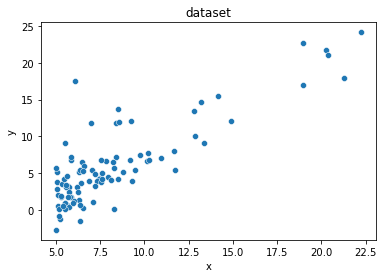

In [3]:
sns.scatterplot(data=df, x='x', y='y').set(title='dataset')
plt.show()

### normal equation

slope: 1.1930336441895983, intercept: -3.8957808783119106


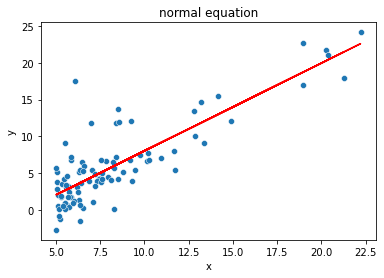

In [5]:
from typing import Tuple

def normal_equation(x: np.array, y: np.array) -> Tuple[float, float]:
    """
    normal equation
    """
    x_bias = np.ones((df['x'].values.shape[0], 1))
    x = np.append(x_bias, x.reshape(x_bias.shape), axis=1)
    # print(x.shape)
    x_t = x.transpose()
    term_1 = np.linalg.inv(x_t.dot(x))
    term_2 = x_t.dot(y)
    intercept, slope = term_1.dot(term_2)
    return slope, intercept

slope, intercept = normal_equation(df['x'].values, df['y'].values)
print(f'slope: {slope}, intercept: {intercept}')

sns.scatterplot(data=df, x='x', y='y').set(title='normal equation')
plt.plot(df['x'].values, slope * df['x'].values + intercept, color='r')
plt.show()

### gradient descent

In [73]:
from typing import List

EPOCHS = 1000

def bgd(x: np.array, y: np.array, learning_rate: float = 1e-4, epochs: int = EPOCHS, verbose: bool = True) -> Tuple[float, float, List[float]]:
    """
    batch gradient descent
    """
    slope, intercept = 0., 0.
    errors: List[float] = []
    for epoch in range(epochs):
        y_predicted = slope * x + intercept
        delta_slope = -sum(x * (y - y_predicted))
        delta_intercept = -sum(y - y_predicted)
        errors.append(delta_intercept ** 2)
        slope -= learning_rate * delta_slope
        intercept -= learning_rate * delta_intercept
        if verbose:
            print(f'epoch {epoch}, error: {delta_intercept:.3f}')

    return slope, intercept, errors

slope, intercept, _ = bgd(df['x'].values, df['y'].values)
print(f'slope: {slope}, intercept: {intercept}')


epoch 0, error: -566.396
epoch 1, error: -59.336
epoch 2, error: 43.211
epoch 3, error: 63.874
epoch 4, error: 67.960
epoch 5, error: 68.691
epoch 6, error: 68.743
epoch 7, error: 68.657
epoch 8, error: 68.544
epoch 9, error: 68.426
epoch 10, error: 68.307
epoch 11, error: 68.187
epoch 12, error: 68.068
epoch 13, error: 67.949
epoch 14, error: 67.830
epoch 15, error: 67.712
epoch 16, error: 67.593
epoch 17, error: 67.475
epoch 18, error: 67.357
epoch 19, error: 67.239
epoch 20, error: 67.122
epoch 21, error: 67.004
epoch 22, error: 66.887
epoch 23, error: 66.770
epoch 24, error: 66.653
epoch 25, error: 66.537
epoch 26, error: 66.421
epoch 27, error: 66.304
epoch 28, error: 66.188
epoch 29, error: 66.073
epoch 30, error: 65.957
epoch 31, error: 65.842
epoch 32, error: 65.727
epoch 33, error: 65.612
epoch 34, error: 65.497
epoch 35, error: 65.383
epoch 36, error: 65.268
epoch 37, error: 65.154
epoch 38, error: 65.040
epoch 39, error: 64.926
epoch 40, error: 64.813
epoch 41, error: 64.700

epoch 436, error: 32.411
epoch 437, error: 32.354
epoch 438, error: 32.297
epoch 439, error: 32.241
epoch 440, error: 32.185
epoch 441, error: 32.128
epoch 442, error: 32.072
epoch 443, error: 32.016
epoch 444, error: 31.960
epoch 445, error: 31.904
epoch 446, error: 31.848
epoch 447, error: 31.793
epoch 448, error: 31.737
epoch 449, error: 31.682
epoch 450, error: 31.626
epoch 451, error: 31.571
epoch 452, error: 31.516
epoch 453, error: 31.461
epoch 454, error: 31.406
epoch 455, error: 31.351
epoch 456, error: 31.296
epoch 457, error: 31.241
epoch 458, error: 31.186
epoch 459, error: 31.132
epoch 460, error: 31.078
epoch 461, error: 31.023
epoch 462, error: 30.969
epoch 463, error: 30.915
epoch 464, error: 30.861
epoch 465, error: 30.807
epoch 466, error: 30.753
epoch 467, error: 30.699
epoch 468, error: 30.645
epoch 469, error: 30.592
epoch 470, error: 30.538
epoch 471, error: 30.485
epoch 472, error: 30.432
epoch 473, error: 30.378
epoch 474, error: 30.325
epoch 475, error: 30.272


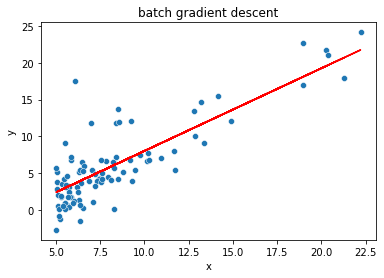

In [46]:
sns.scatterplot(data=df, x='x', y='y').set(title='batch gradient descent')
plt.plot(df['x'].values, slope * df['x'].values + intercept, color='r')
plt.show()

In [72]:
def sgd(x: np.array, y: np.array, learning_rate: float = 1e-4, epochs: int = EPOCHS, verbose: bool = True) -> Tuple[float, float, List[float]]:
    """
    stochastic gradient descent
    """
    intercept, slope = 0., 0.
    data = np.array(list(zip(x, y)), dtype=np.float)
    errors: List[float] = []
    for epoch in range(epochs):
        epoch_error = 0.
        for elem in data:
            y_predicted = intercept + slope * elem[0]
            error = y_predicted - elem[1]
            epoch_error += error ** 2
            intercept -= learning_rate * error
            slope -= learning_rate * error * elem[0]
        errors.append(epoch_error)
        if verbose:
            print(f'epoch {epoch}, error: {epoch_error:.3f}')
    return slope, intercept, errors

slope, intercept, _ = sgd(df['x'].values, df['y'].values)
print(f'slope: {slope}, intercept: {intercept}')


epoch 0, error: 3844.750
epoch 1, error: 1781.701
epoch 2, error: 1319.458
epoch 3, error: 1204.266
epoch 4, error: 1170.609
epoch 5, error: 1158.699
epoch 6, error: 1153.576
epoch 7, error: 1150.900
epoch 8, error: 1149.203
epoch 9, error: 1147.922
epoch 10, error: 1146.824
epoch 11, error: 1145.809
epoch 12, error: 1144.833
epoch 13, error: 1143.875
epoch 14, error: 1142.928
epoch 15, error: 1141.987
epoch 16, error: 1141.051
epoch 17, error: 1140.119
epoch 18, error: 1139.190
epoch 19, error: 1138.264
epoch 20, error: 1137.342
epoch 21, error: 1136.423
epoch 22, error: 1135.508
epoch 23, error: 1134.595
epoch 24, error: 1133.686
epoch 25, error: 1132.780
epoch 26, error: 1131.877
epoch 27, error: 1130.977
epoch 28, error: 1130.081
epoch 29, error: 1129.187
epoch 30, error: 1128.297
epoch 31, error: 1127.410
epoch 32, error: 1126.526
epoch 33, error: 1125.645
epoch 34, error: 1124.767
epoch 35, error: 1123.892
epoch 36, error: 1123.020
epoch 37, error: 1122.151
epoch 38, error: 1121.

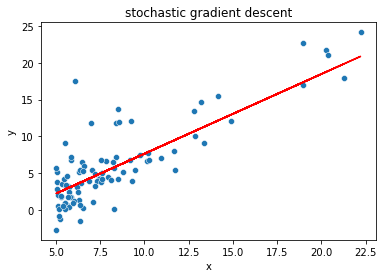

In [48]:
sns.scatterplot(data=df, x='x', y='y').set(title='stochastic gradient descent')
plt.plot(df['x'].values, slope * df['x'].values + intercept, color='r')
plt.show()

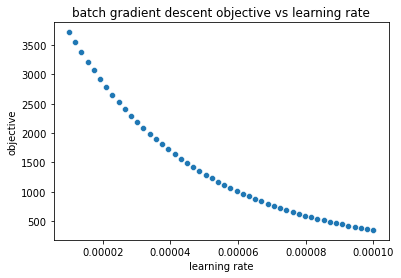

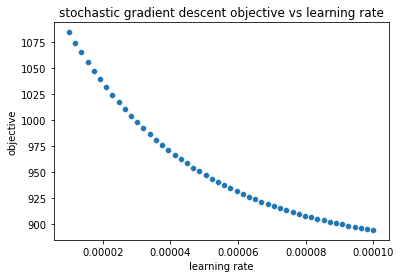

In [87]:
learning_rates = np.linspace(1e-5, 1e-4, 50)
epochs=750
bgd_errors: List[float] = []
sgd_errors: List[float] = []
for rate in learning_rates:
    _, _, errors = bgd(df['x'].values, df['y'].values, learning_rate=rate, epochs=epochs, verbose=False)
    bgd_errors.append(errors[-1])
    _, _, errors = sgd(df['x'].values, df['y'].values, learning_rate=rate, epochs=epochs, verbose=False)
    sgd_errors.append(errors[-1])

sns.scatterplot(x=learning_rates, y=bgd_errors).set(title='batch gradient descent objective vs learning rate')
plt.xlabel('learning rate')
plt.ylabel('objective')

plt.show()

sns.scatterplot(x=learning_rates, y=sgd_errors).set(title='stochastic gradient descent objective vs learning rate')
plt.xlabel('learning rate')
plt.ylabel('objective')

plt.show()

### analysis

Batch gradient descent seemed to output a result faster than stochastic gradient descent. However, it took more epochs to do so, so therefore sgd converged faster than bgd. Looking at the cost function vs learning rate graphs, both algorithms benefit from a higher learning rate, with a logarithmic trend. However, at a certain point the learning rate becomes too high, and it starts to jump towards infinity. From testing several inputs, a rate of 1e-4 seemed to work best. Both algorithms were accurate, and it is hard to say which produced the better output. bgd outputted slope: 1.123634596846622, intercept: -3.2049739665568446, and sgd outputted slope: 1.0828594384399433, intercept: -3.1733625776518646.